In [131]:
import pandas as pd
import os
import csv
import numpy as np
import matplotlib.pyplot as plt


In [385]:
csvpath = os.path.join("csv-data", "anxiety-depression-data.csv")

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(csvpath)

# Filter rows where the "state" column is not equal to "United States"
by_state_df = df[(df['State'] != 'United States') & 
                (df['Group'] == 'By State') & 
                (df['Indicator'] == 'Symptoms of Anxiety Disorder or Depressive Disorder')]
by_state_df['date_column'] = pd.to_datetime(by_state_df['Time Period Start Date'], format='%m/%d/%Y')
by_state_df['Year'] = by_state_df['date_column'].dt.year

state_mean_df = by_state_df.groupby('State')['Value'].mean()
higher_states = state_mean_df.nlargest(3)
lower_states = state_mean_df.nsmallest(3)

yearly_state_mean_df = by_state_df.groupby(['State', 'Year'])['Value'].mean().reset_index()
state_mean_2020_df = yearly_state_mean_df.loc[yearly_state_mean_df['Year'] == 2020].set_index('State')
state_mean_2021_df = yearly_state_mean_df.loc[yearly_state_mean_df['Year'] == 2021].set_index('State')
state_mean_2022_df = yearly_state_mean_df.loc[yearly_state_mean_df['Year'] == 2022].set_index('State')
state_mean_2023_df = yearly_state_mean_df.loc[yearly_state_mean_df['Year'] == 2023].set_index('State')
higher_states_2020 = state_mean_2020_df['Value'].nlargest(3)
lower_states_2020 = state_mean_2020_df['Value'].nsmallest(3)
higher_states_2021 = state_mean_2021_df['Value'].nlargest(3)
lower_states_2021 = state_mean_2021_df['Value'].nsmallest(3)
higher_states_2022 = state_mean_2022_df['Value'].nlargest(3)
lower_states_2022 = state_mean_2022_df['Value'].nsmallest(3)
higher_states_2023 = state_mean_2023_df['Value'].nlargest(3)
lower_states_2023 = state_mean_2023_df['Value'].nsmallest(3)

highest_states_tot = pd.DataFrame({'Total Avg': higher_states.index,
                     '2020 Avg': higher_states_2020.index,
                     '2021 Avg': higher_states_2021.index,
                     '2022 Avg': higher_states_2022.index,
                     '2023 Avg': higher_states_2023.index})
lowest_states_tot = pd.DataFrame({'Total Avg': lower_states.index,
                     '2020 Avg': lower_states_2020.index,
                     '2021 Avg': lower_states_2021.index,
                     '2022 Avg': lower_states_2022.index,
                     '2023 Avg': lower_states_2023.index})
print('States with Highest Level of Anxiety and Depression')
print(highest_states_tot)
print(' ')
print('--------------------- ')
print(' ')
print('States with Lowest Level of Anxiety and Depression')
print(lowest_states_tot)

group1_states = ['South Dakota', 'Minnesota', 'North Dakota']
group2_states = ['Louisiana', 'Mississippi', 'Oklahoma']


States with Highest Level of Anxiety and Depression
     Total Avg     2020 Avg   2021 Avg     2022 Avg       2023 Avg
0    Louisiana    Louisiana  Louisiana  Mississippi    Mississippi
1  Mississippi       Nevada   Oklahoma    Louisiana      Louisiana
2     Oklahoma  Mississippi   Arkansas     Oklahoma  West Virginia
 
--------------------- 
 
States with Lowest Level of Anxiety and Depression
      Total Avg      2020 Avg      2021 Avg      2022 Avg  \
0  South Dakota  North Dakota  South Dakota     Minnesota   
1     Minnesota  South Dakota     Minnesota  South Dakota   
2  North Dakota     Wisconsin     Wisconsin      Delaware   

               2023 Avg  
0               Vermont  
1             Minnesota  
2  District of Columbia  


/var/folders/0k/5q4qk6494fv19cyy13rpg8hm0000gn/T/ipykernel_40813/2925107942.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  by_state_df['date_column'] = pd.to_datetime(by_state_df['Time Period Start Date'], format='%m/%d/%Y')
/var/folders/0k/5q4qk6494fv19cyy13rpg8hm0000gn/T/ipykernel_40813/2925107942.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  by_state_df['Year'] = by_state_df['date_column'].dt.year


array(['National Estimate', 'By Age', 'By Sex',
       'By Race/Hispanic ethnicity', 'By Education', 'By State',
       'By Disability status', 'By Gender identity',
       'By Sexual orientation'], dtype=object)

In [474]:
#Import data sets
unin_2019_path =  os.path.join('csv-data', '2019-unisured-pop-data.csv')
unin_2021_path =  os.path.join('csv-data', '2021-unisured-pop-data.csv')
unin_2022_path =  os.path.join('csv-data', '2022-unisured-pop-data.csv')
hpsa_total_path =  os.path.join('csv-data', 'hpsa_total.csv')
med_enr_path =  os.path.join('csv-data', 'medicaid-chip-data.csv')
beh_health_path = os.path.join('csv-data', 'Behavioral-Health-Services-Provided-to-the-MedicaidCHIP-Population.csv')

unin_2019_full_df =  pd.read_csv(unin_2019_path)
unin_2021_full_df =  pd.read_csv(unin_2021_path)
unin_2022_full_df =  pd.read_csv(unin_2022_path)
hpsa_full_df =  pd.read_csv(hpsa_total_path)
med_enr_full_df =  pd.read_csv(med_enr_path)
beh_health_full_df = pd.read_csv(beh_health_path)

,State,Year,Month,Condition,BehavioralHealthService,ServiceCount,RatePer1000Beneficiaries,DataQuality
0,Alabama,2018,201801,Mental health disorder,Emergency department,"5,925",4.8,NaN
1,Alabama,2018,201801,Mental health disorder,Inpatient,"3,618",2.9,NaN
2,Alabama,2018,201801,Mental health disorder,Intensive outpatient/Partial hospitalization,"9,490",7.7,NaN
3,Alabama,2018,201801,Mental health disorder,Outpatient,"121,365",98.6,NaN
4,Alabama,2018,201801,Mental health disorder,Telehealth,485,0.4,NaN
...,...,...,...,...,...,...,...,...
31795,Wyoming,2022,202212,Substance use disorder,Emergency department,384,4.3,NaN
31796,Wyoming,2022,202212,Substance use disorder,Inpatient,156,1.7,NaN
31797,Wyoming,2022,202212,Substance use disorder,Intensive outpatient/Partial hospitalization,645,7.2,NaN
31798,Wyoming,2022,202212,Substance use disorder,Outpatient,189,2.1,NaN


Text(0.5, 1.0, 'Substance use disorder')

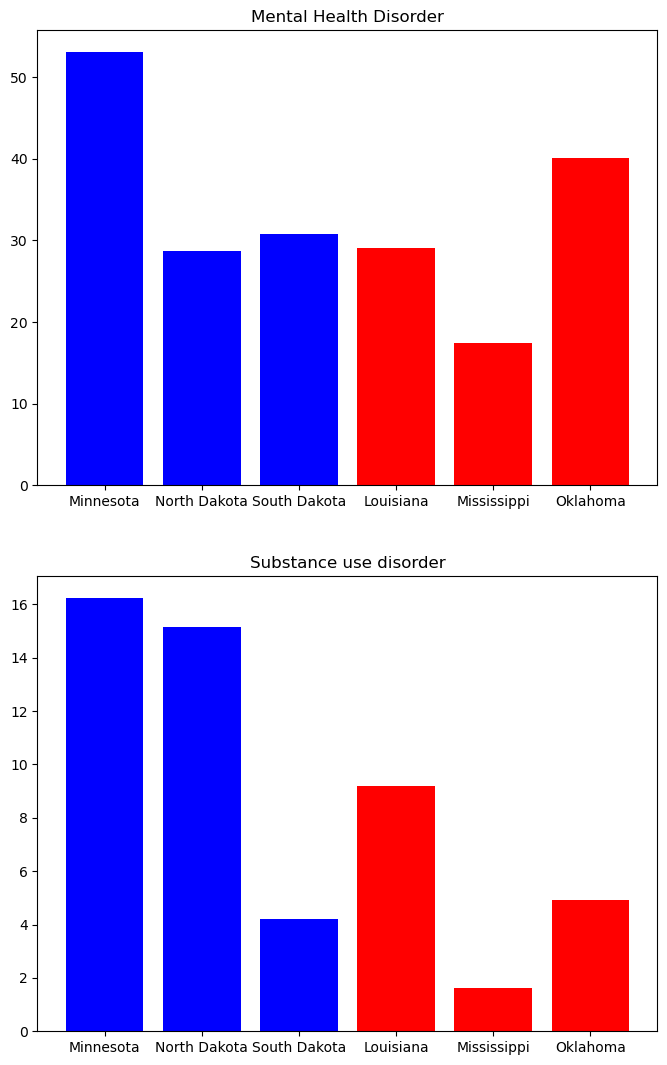

In [475]:
# Leading cause of death


group1_beh_health_clean_df = []
for states in lower_states.index:
    group1_beh_health_clean_df.append(beh_health_full_df.loc[(beh_health_full_df['State'] == states) & 
    (beh_health_full_df['Year'] != 2018)])
group1_beh_health_clean_df =  pd.concat(group1_beh_health_clean_df, ignore_index = 'true')[['State', 'Year', 'Condition', 'RatePer1000Beneficiaries']]
group1_beh_health_clean_df['RatePer1000Beneficiaries'] = group1_beh_health_clean_df['RatePer1000Beneficiaries'].str.replace(',', '').astype(float)
group1_beh_health_clean_df = group1_beh_health_clean_df.groupby(['State', 'Condition'])['RatePer1000Beneficiaries'].mean().reset_index()
group1_beh_health_clean_df = group1_beh_health_clean_df.set_index('Condition')

group2_beh_health_clean_df = []
for states in higher_states.index:
    group2_beh_health_clean_df.append(beh_health_full_df.loc[(beh_health_full_df['State'] == states) & 
    (beh_health_full_df['Year'] != 2018)])
group2_beh_health_clean_df =  pd.concat(group2_beh_health_clean_df, ignore_index = 'true')[['State', 'Year', 'Condition', 'RatePer1000Beneficiaries']]
group2_beh_health_clean_df['RatePer1000Beneficiaries'] = pd.to_numeric(group2_beh_health_clean_df['RatePer1000Beneficiaries'].str.replace(',', ''), errors='coerce')
group2_beh_health_clean_df = group2_beh_health_clean_df.groupby(['State', 'Condition'])['RatePer1000Beneficiaries'].mean().reset_index()

group2_beh_health_clean_df = group2_beh_health_clean_df.set_index('Condition')


fig, axs = plt.subplots(2, 1, figsize=(8, 13))

axs[0].bar(group1_beh_health_clean_df.loc['Mental health disorder']['State'], 
           group1_beh_health_clean_df.loc['Mental health disorder']['RatePer1000Beneficiaries'], color='blue', label='Group 1')
axs[0].bar(group2_beh_health_clean_df.loc['Mental health disorder']['State'], 
           group2_beh_health_clean_df.loc['Mental health disorder']['RatePer1000Beneficiaries'], color='red', label='Group 1')
axs[0].set_title('Mental Health Disorder')

axs[1].bar(group1_beh_health_clean_df.loc['Substance use disorder']['State'], 
           group1_beh_health_clean_df.loc['Substance use disorder']['RatePer1000Beneficiaries'], color='blue', label='Group 1')
axs[1].bar(group2_beh_health_clean_df.loc['Substance use disorder']['State'], 
           group2_beh_health_clean_df.loc['Substance use disorder']['RatePer1000Beneficiaries'], color='red', label='Group 1')
axs[1].set_title('Substance use disorder')


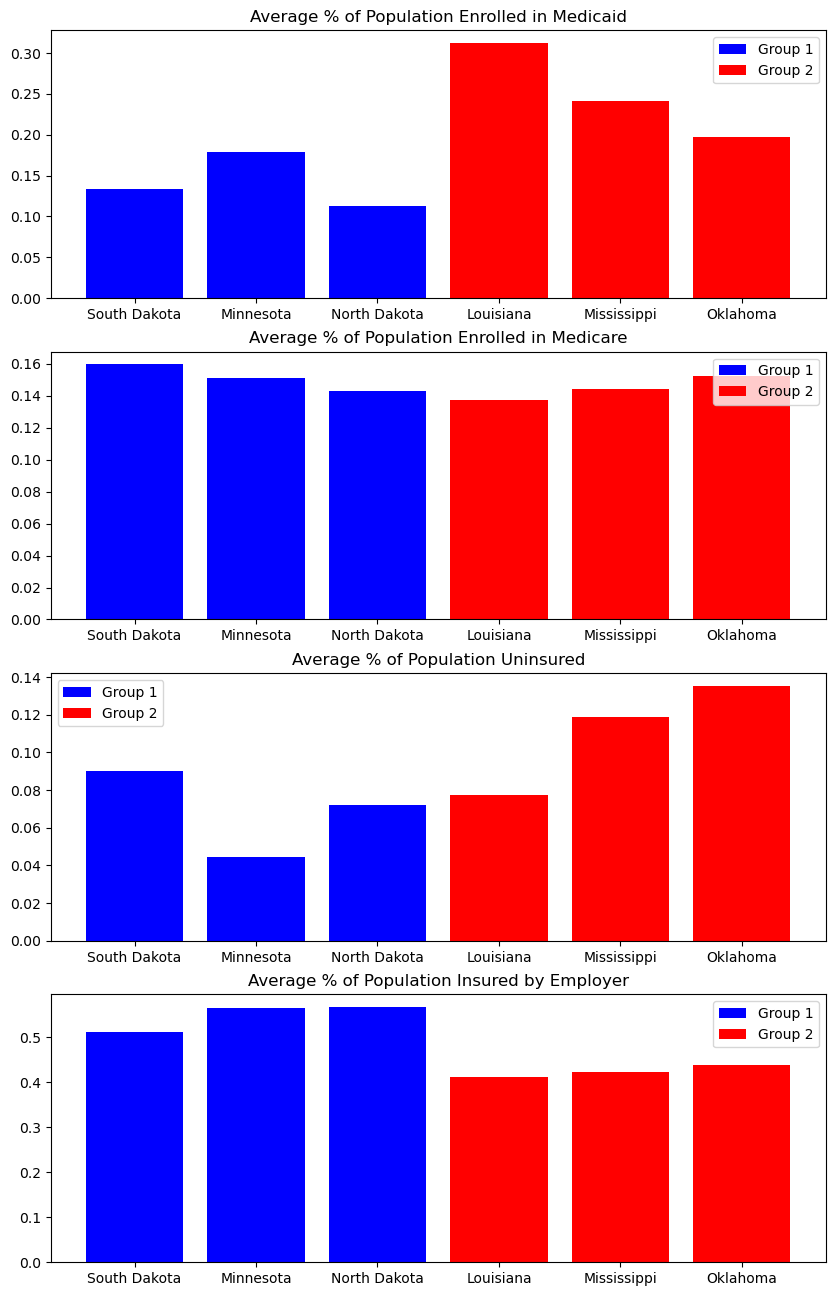

In [444]:
#Uninsured and Insured Data Set
in_clean_df = pd.merge(unin_2019_full_df[['Location', 'Medicaid', 'Medicare', 'Uninsured', 'Employer']], 
                        unin_2021_full_df[['Location', 'Medicaid', 'Medicare', 'Uninsured', 'Employer']], on = 'Location')
in_clean_df = pd.merge(in_clean_df, unin_2022_full_df[['Location', 'Medicaid', 'Medicare', 'Uninsured', 'Employer']], on = 'Location').dropna(how='any')

group1_state_in_clean_df = []
for states in lower_states.index:
    group1_state_in_clean_df.append(in_clean_df.loc[in_clean_df['Location'] == states])
group1_state_in_clean_df = pd.concat(group1_state_in_clean_df, ignore_index=True)
group1_state_in_clean_df = group1_state_in_clean_df.rename(columns= {'Medicaid_x': 'Medicaid_2019',
                             'Medicaid_y': 'Medicaid_2021',
                             'Medicaid': 'Medicaid_2022',
                             'Medicare_x': 'Medicare_2019',
                             'Medicare_y': 'Medicare_2021',
                             'Medicare': 'Medicare_2022',
                             'Uninsured_x': 'Uninsured_2019',
                             'Uninsured_y': 'Uninsured_2021',
                             'Uninsured': 'Uninsured_2022',
                             'Employer_y': 'Employer_2021',
                             'Employer': 'Employer_2022',
                             'Employer_x': 'Employer_2019'})

avg_medicaid_g1 = np.mean(group1_state_in_clean_df.set_index('Location')[['Medicaid_2019',
                                                                       'Medicaid_2021',
                                                                       'Medicaid_2022']], axis=1)
avg_medicare_g1 = np.mean(group1_state_in_clean_df.set_index('Location')[['Medicare_2019',
                                                                       'Medicare_2021',
                                                                       'Medicare_2022']], axis=1)
avg_uninsured_g1 = np.mean(group1_state_in_clean_df.set_index('Location')[['Uninsured_2019',
                                                                        'Uninsured_2021',
                                                                        'Uninsured_2022']], axis=1)
avg_employer_g1 = np.mean(group1_state_in_clean_df.set_index('Location')[['Employer_2019',
                                                                       'Employer_2021',
                                                                       'Employer_2022']], axis=1)
group2_state_in_clean_df = []
for states in higher_states.index:
    group2_state_in_clean_df.append(in_clean_df.loc[in_clean_df['Location'] == states])
group2_state_in_clean_df = pd.concat(group2_state_in_clean_df, ignore_index=True)
group2_state_in_clean_df = group2_state_in_clean_df.rename(columns= {'Medicaid_x': 'Medicaid_2019',
                             'Medicaid_y': 'Medicaid_2021',
                             'Medicaid': 'Medicaid_2022',
                             'Medicare_x': 'Medicare_2019',
                             'Medicare_y': 'Medicare_2021',
                             'Medicare': 'Medicare_2022',
                             'Uninsured_x': 'Uninsured_2019',
                             'Uninsured_y': 'Uninsured_2021',
                             'Uninsured': 'Uninsured_2022',
                             'Employer_y': 'Employer_2021',
                             'Employer': 'Employer_2022',
                             'Employer_x': 'Employer_2019'})

avg_medicaid_g2 = np.mean(group2_state_in_clean_df.set_index('Location')[['Medicaid_2019',
                                                                       'Medicaid_2021',
                                                                       'Medicaid_2022']], axis=1)
avg_medicare_g2 = np.mean(group2_state_in_clean_df.set_index('Location')[['Medicare_2019',
                                                                       'Medicare_2021',
                                                                       'Medicare_2022']], axis=1)
avg_uninsured_g2 = np.mean(group2_state_in_clean_df.set_index('Location')[['Uninsured_2019',
                                                                       'Uninsured_2021',
                                                                       'Uninsured_2022']], axis=1)
avg_employer_g2 = np.mean(group2_state_in_clean_df.set_index('Location')[['Employer_2019',
                                                                       'Employer_2021',
                                                                       'Employer_2022']], axis=1)

fig, axs = plt.subplots(4, 1, figsize=(10, 16))
axs[0].bar(avg_medicaid_g1.index, avg_medicaid_g1, color='blue', label='Group 1')
axs[0].bar(avg_medicaid_g2.index, avg_medicaid_g2, color='red', label='Group 2')
axs[0].set_title('Average % of Population Enrolled in Medicaid')
axs[0].legend()

axs[1].bar(avg_medicare_g1.index, avg_medicare_g1, color='blue', label='Group 1')
axs[1].bar(avg_medicare_g2.index, avg_medicare_g2, color='red', label='Group 2')
axs[1].set_title('Average % of Population Enrolled in Medicare')
axs[1].legend()

axs[2].bar(avg_uninsured_g1.index, avg_uninsured_g1, color='blue', label='Group 1')
axs[2].bar(avg_uninsured_g2.index, avg_uninsured_g2, color='red', label='Group 2')
axs[2].set_title('Average % of Population Uninsured')
axs[2].legend()

axs[3].bar(avg_employer_g1.index, avg_employer_g1, color='blue', label='Group 1')
axs[3].bar(avg_employer_g2.index, avg_employer_g2, color='red', label='Group 2')
axs[3].set_title('Average % of Population Insured by Employer')
axs[3].legend()



/var/folders/0k/5q4qk6494fv19cyy13rpg8hm0000gn/T/ipykernel_40813/3590201129.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=45, ha='right')
/var/folders/0k/5q4qk6494fv19cyy13rpg8hm0000gn/T/ipykernel_40813/3590201129.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=45, ha='right')
/var/folders/0k/5q4qk6494fv19cyy13rpg8hm0000gn/T/ipykernel_40813/3590201129.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=45, ha='right')
/var/folders/0k/5q4qk6494fv19cyy13rpg8hm0000gn/T/ipykernel_40813/3590201129.py:23: UserWarning: set_ticklabels() should only be used with a

,Discipline,HHS Region,State,County,HPSA ID,HPSA Name,HPSA Score,HPSA Type (Category),HPSA Type Code,HPSA Sub -Type,...,HPSA Component ID,HPSA Component Name,HPSA Component Type,HPSA Facility Address,HPSA Facility City and State,HPSA Facility ZIP Code,Proper County Name and State Abbreviation,As of Date (Close of Business Date),HRSA Data Warehouse Processing Date,Unnamed: 25
0,Mental Health,Region 5,Michigan,Wayne,7268708674,Northwest Detroit,11,Geographic Area,Hpsa Geo HN,Geographic HPSA,...,NaN,"Census Tract 5423, Wayne County, Michigan",Census Tract,NaN,NaN,NaN,"Wayne County, MI",2023/07/05,07/06/2023,NaN
1,Mental Health,Region 5,Michigan,Wayne,7268708674,Northwest Detroit,11,Geographic Area,Hpsa Geo HN,Geographic HPSA,...,NaN,"Census Tract 5412, Wayne County, Michigan",Census Tract,NaN,NaN,NaN,"Wayne County, MI",2023/07/05,07/06/2023,NaN
2,Mental Health,Region 5,Michigan,Wayne,7268708674,Northwest Detroit,11,Geographic Area,Hpsa Geo HN,Geographic HPSA,...,NaN,"Census Tract 5351, Wayne County, Michigan",Census Tract,NaN,NaN,NaN,"Wayne County, MI",2023/07/05,07/06/2023,NaN
3,Mental Health,Region 5,Michigan,Wayne,7268708674,Northwest Detroit,11,Geographic Area,Hpsa Geo HN,Geographic HPSA,...,NaN,"Census Tract 5317, Wayne County, Michigan",Census Tract,NaN,NaN,NaN,"Wayne County, MI",2023/07/05,07/06/2023,NaN
4,Mental Health,Region 5,Michigan,Wayne,7268708674,Northwest Detroit,11,Geographic Area,Hpsa Geo HN,Geographic HPSA,...,NaN,"Census Tract 5225, Wayne County, Michigan",Census Tract,NaN,NaN,NaN,"Wayne County, MI",2023/07/05,07/06/2023,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71322,Primary Care,Region 9,California,Fresno,1068834561,ME - MSSA 35d/Fresno East Central,19,Population Group,Hpsa Pop,Medicaid Eligible Population HPSA,...,NaN,"Census Tract 29.06, Fresno County, California",Census Tract,NaN,NaN,NaN,"Fresno County, CA",2023/07/05,07/06/2023,NaN
71323,Primary Care,Region 9,California,Fresno,1068834561,ME - MSSA 35d/Fresno East Central,19,Population Group,Hpsa Pop,Medicaid Eligible Population HPSA,...,NaN,"Census Tract 30.01, Fresno County, California",Census Tract,NaN,NaN,NaN,"Fresno County, CA",2023/07/05,07/06/2023,NaN
71324,Primary Care,Region 9,California,Fresno,1068834561,ME - MSSA 35d/Fresno East Central,19,Population Group,Hpsa Pop,Medicaid Eligible Population HPSA,...,NaN,"Census Tract 30.03, Fresno County, California",Census Tract,NaN,NaN,NaN,"Fresno County, CA",2023/07/05,07/06/2023,NaN
71325,Primary Care,Region 9,California,Fresno,1068834561,ME - MSSA 35d/Fresno East Central,19,Population Group,Hpsa Pop,Medicaid Eligible Population HPSA,...,NaN,"Census Tract 30.04, Fresno County, California",Census Tract,NaN,NaN,NaN,"Fresno County, CA",2023/07/05,07/06/2023,NaN


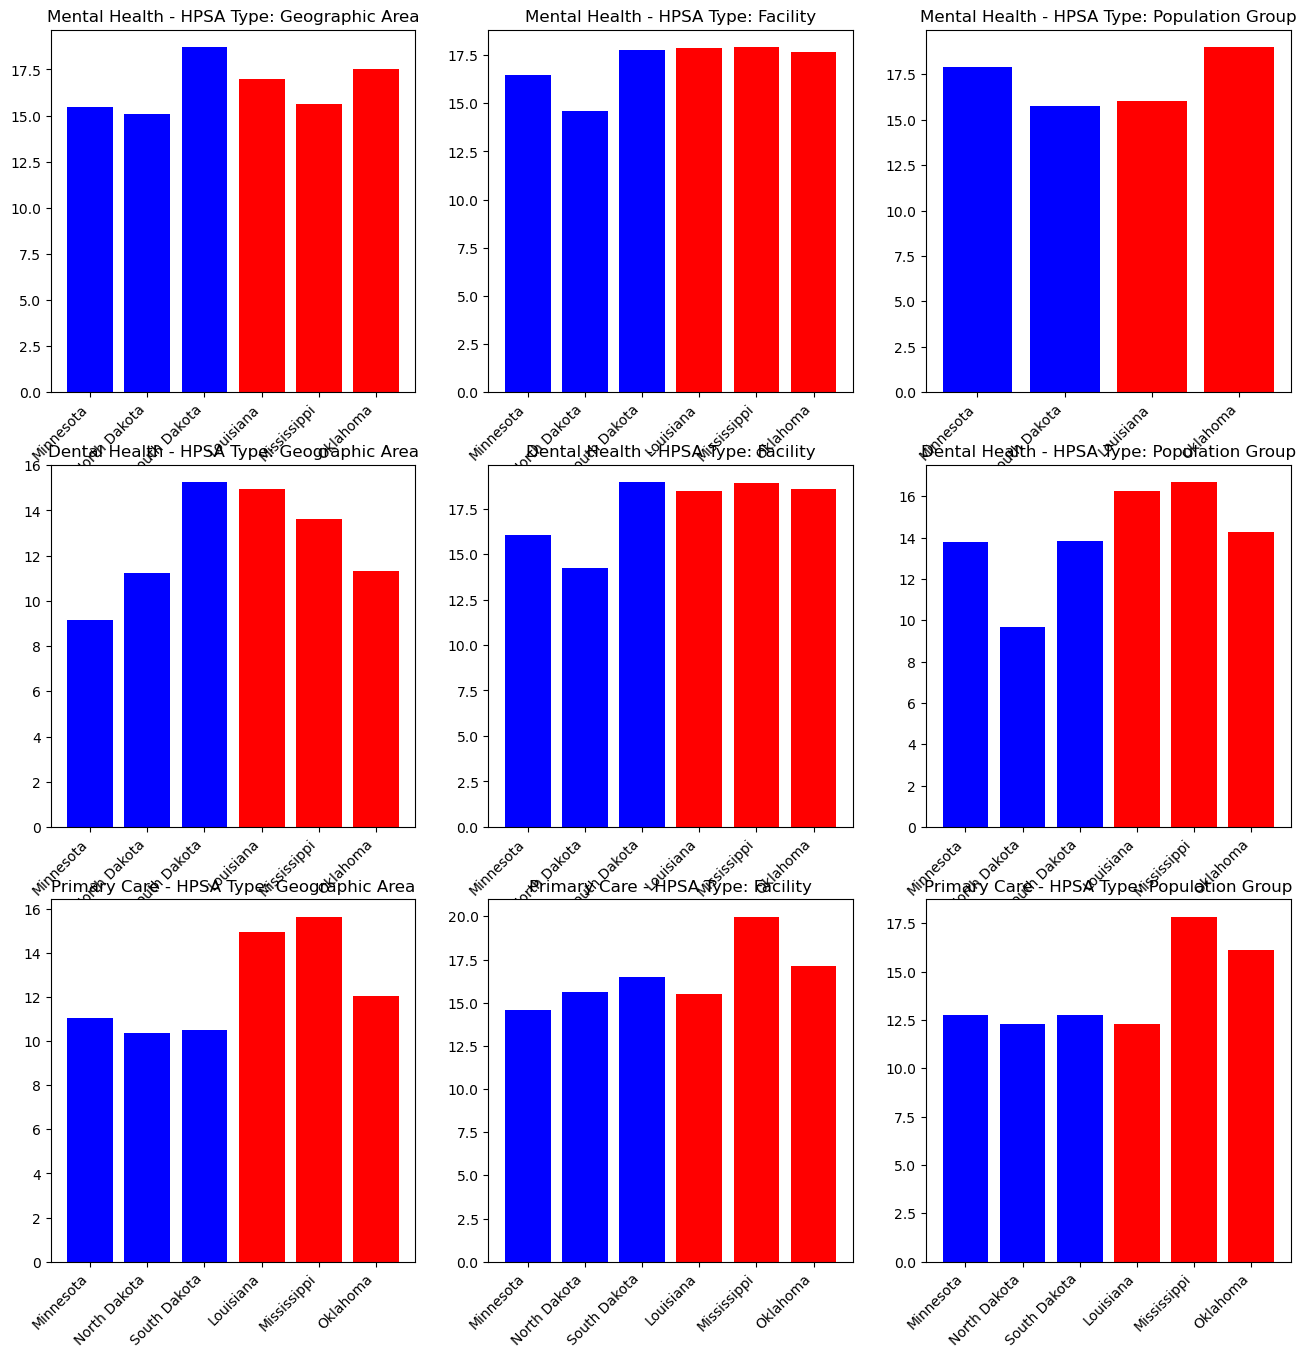

In [382]:
hpsa_clean_df = hpsa_full_df[['Discipline', 'State', 'HPSA Type (Category)', 'HPSA Score']]
disciplines = hpsa_clean_df['Discipline'].unique()
hpsa_cats = hpsa_clean_df['HPSA Type (Category)'].unique()

group1_hpsa_df = hpsa_clean_df[hpsa_clean_df['State'].isin(group1_states)]
group1_hpsa_df = group1_hpsa_df.groupby(['Discipline', 'State', 'HPSA Type (Category)']).mean()

group2_hpsa_df = hpsa_clean_df[hpsa_clean_df['State'].isin(group2_states)]
group2_hpsa_df = group2_hpsa_df.groupby(['Discipline', 'State', 'HPSA Type (Category)']).mean()

fig, axs = plt.subplots(3, 3, figsize=(16, 16))
axs = axs.flatten()


def hpsa_plots(hpsa_category, disc, i):
        group1_data = group1_hpsa_df.xs(hpsa_category, level='HPSA Type (Category)').xs(disc, level='Discipline')
        axs[i].bar(group1_data.index, group1_data['HPSA Score'], color='blue', label='Group 1')

        group2_data = group2_hpsa_df.xs(hpsa_category, level='HPSA Type (Category)').xs(disc, level='Discipline')
        axs[i].bar(group2_data.index, group2_data['HPSA Score'], color='red', label='Group 2')

        axs[i].set_title(f'{disc} - HPSA Type: {hpsa_category}')
        axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=45, ha='right')
        
i=0
for disc in disciplines:
    for hpsa_category in hpsa_cats:
        hpsa_plots(hpsa_category, disc, i)
        i = i+1
hpsa_full_df

/var/folders/0k/5q4qk6494fv19cyy13rpg8hm0000gn/T/ipykernel_40813/2862970148.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=45, ha='right')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start w

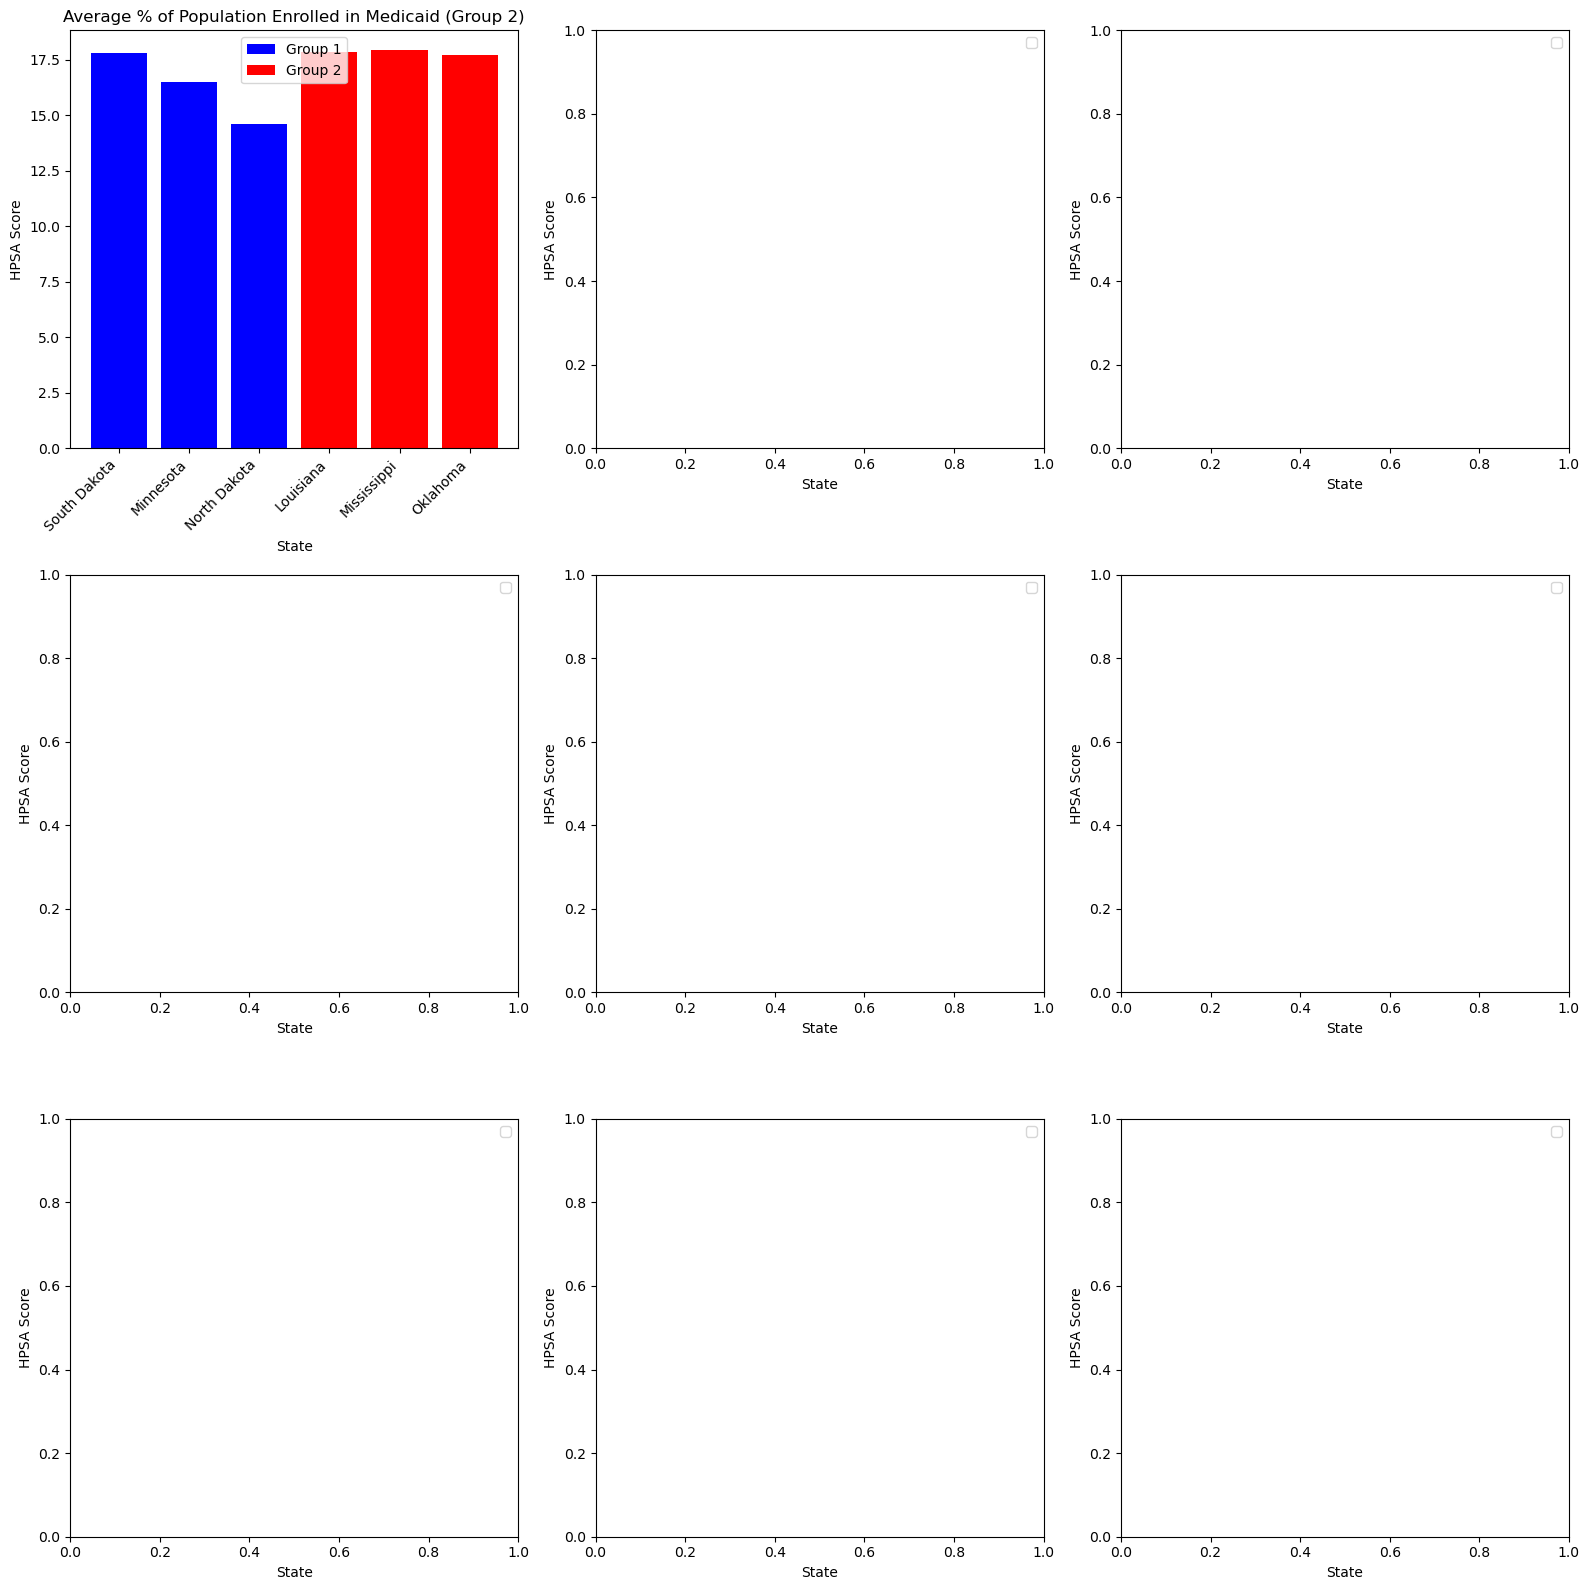

In [288]:
hpsa_clean_df = hpsa_full_df[['Discipline', 'State', 'HPSA Type (Category)', 'HPSA Score']]

mh_hpsa_clean_df = hpsa_clean_df.loc[hpsa_clean_df['Discipline'] == 'Mental Health'][['State', 'HPSA Type (Category)', 'HPSA Score']]
mh_hpsa_clean_df = mh_hpsa_clean_df.set_index(['State', 'HPSA Type (Category)'])
mh_hpsa_clean_df = mh_hpsa_clean_df.groupby(['State', 'HPSA Type (Category)']).mean()

mh_hpsa_group1_df = mh_hpsa_clean_df.loc[lower_states.index]
mh_hpsa_group2_df = mh_hpsa_clean_df.loc[higher_states.index]

pc_hpsa_clean_df = hpsa_clean_df.loc[hpsa_clean_df['Discipline'] == 'Primary Care'][['State', 'HPSA Type (Category)', 'HPSA Score']]
pc_hpsa_clean_df = pc_hpsa_clean_df.set_index(['State', 'HPSA Type (Category)'])
pc_hpsa_clean_df = pc_hpsa_clean_df.groupby(['State', 'HPSA Type (Category)']).mean()

pc_hpsa_group1_df = pc_hpsa_clean_df.loc[lower_states.index]
pc_hpsa_group2_df = pc_hpsa_clean_df.loc[higher_states.index]

dh_hpsa_clean_df = hpsa_clean_df.loc[hpsa_clean_df['Discipline'] == 'Dental Health'][['State', 'HPSA Type (Category)', 'HPSA Score']]
dh_hpsa_clean_df = dh_hpsa_clean_df.set_index(['State', 'HPSA Type (Category)'])
dh_hpsa_clean_df = dh_hpsa_clean_df.groupby(['State', 'HPSA Type (Category)']).mean()

dh_hpsa_group1_df = dh_hpsa_clean_df.loc[lower_states.index]
dh_hpsa_group2_df = dh_hpsa_clean_df.loc[higher_states.index]

# Create subplots
fig, axs = plt.subplots(3, 3, figsize=(16, 16))
axs = axs.flatten()


group1_data_fac_mh = mh_hpsa_group1_df.xs('Facility', level='HPSA Type (Category)')
axs[0].bar(group1_data_fac_mh.index, group1_data_fac_mh['HPSA Score'], color='blue', label='Group 1')


group2_data_fac_mh = mh_hpsa_group2_df.xs('Facility', level='HPSA Type (Category)')
axs[0].bar(group2_data_fac_mh.index, group2_data_fac_mh['HPSA Score'], color='red', label='Group 2')
axs[0].set_title('Average % of Population Enrolled in Medicaid (Group 2)')
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=45, ha='right')


# Customize labels, legends, and layout
for ax in axs:
    ax.set_ylabel('HPSA Score')
    ax.set_xlabel('State')
    ax.legend()

plt.tight_layout()
plt.show()